In [1]:
import numpy as np
from tqdm import tqdm
from gp import Node, Symreg_gp, Individual

In [2]:
import numpy as np

# Get all numpy ufunc callable
ufuncs = [obj for _, obj in np.__dict__.items() if isinstance(obj, np.ufunc)]

# Displau ufuncs list
print(len(ufuncs), ufuncs)

valid_ufuncs = Symreg_gp.get_valid_ufuncs()
print(len(valid_ufuncs), valid_ufuncs)

106 [<ufunc 'absolute'>, <ufunc 'absolute'>, <ufunc 'arccos'>, <ufunc 'arccosh'>, <ufunc 'add'>, <ufunc 'arccos'>, <ufunc 'arccosh'>, <ufunc 'arcsin'>, <ufunc 'arcsinh'>, <ufunc 'arctan'>, <ufunc 'arctan2'>, <ufunc 'arctanh'>, <ufunc 'arcsin'>, <ufunc 'arcsinh'>, <ufunc 'arctan'>, <ufunc 'arctanh'>, <ufunc 'arctan2'>, <ufunc 'bitwise_and'>, <ufunc 'bitwise_count'>, <ufunc 'invert'>, <ufunc 'left_shift'>, <ufunc 'invert'>, <ufunc 'bitwise_or'>, <ufunc 'right_shift'>, <ufunc 'bitwise_xor'>, <ufunc 'cbrt'>, <ufunc 'ceil'>, <ufunc 'conjugate'>, <ufunc 'conjugate'>, <ufunc 'copysign'>, <ufunc 'cos'>, <ufunc 'cosh'>, <ufunc 'deg2rad'>, <ufunc 'degrees'>, <ufunc 'divide'>, <ufunc 'divmod'>, <ufunc 'equal'>, <ufunc 'exp'>, <ufunc 'exp2'>, <ufunc 'expm1'>, <ufunc 'fabs'>, <ufunc 'float_power'>, <ufunc 'floor'>, <ufunc 'floor_divide'>, <ufunc 'fmax'>, <ufunc 'fmin'>, <ufunc 'fmod'>, <ufunc 'frexp'>, <ufunc 'gcd'>, <ufunc 'greater'>, <ufunc 'greater_equal'>, <ufunc 'heaviside'>, <ufunc 'hypot'>, 

In [3]:
problem = np.load('../data/problem_1.npz')
X = problem['x']
Y = problem['y']
print(X.shape)
print(Y.shape)

(1, 500)
(500,)


In [4]:
a = Symreg_gp(len(X), Y, 10, 30, 6)
a.train(True)

In [5]:
for _ in tqdm(range(500)):
    a(X.T)
    a.update_mse()

  0%|          | 0/500 [00:00<?, ?it/s]/home/loiodilu/polito/computational_intelligence/CI2024_project-work/src/gp/node.py:20: RuntimeWarning: invalid value encountered in arctanh
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/CI2024_project-work/src/gp/node.py:20: RuntimeWarning: invalid value encountered in sqrt
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/CI2024_project-work/src/gp/node.py:20: RuntimeWarning: invalid value encountered in logaddexp
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/CI2024_project-work/src/gp/node.py:20: RuntimeWarning: overflow encountered in power
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/CI2024_project-work/src/gp/node.py:20: RuntimeWarning: invalid value encountered in log
  return value(*_args)
/home/loiodilu/polito/computational_intelligence/CI2024_project-work/src/gp/node.py:20: RuntimeWarning: invalid value encountered in logaddexp2
  return 

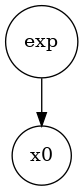

[np.float64(138.73916157112856), np.float64(138.73916157112856), np.float64(0.32815452238947035), np.float64(131.1516823462557), np.float64(0.32815452238947035), np.float64(0.32815452238947035), np.float64(0.32815452238947035), np.float64(44.54594770444776), np.float64(0.32815452238947035), np.float64(37.06174381183848)]
49.187846961674644
0.32815452238947035


In [6]:
a(X.T)
mean_square_errors = a.update_mse(draw_fittest=True)
print(mean_square_errors)
print(np.mean(mean_square_errors))
print(np.min(mean_square_errors))